# Teoría de los Circuitos II - R4001  #
# Tarea Semanal 5 Bis - Fiasche Nahuel #

# Cálculo Analítico
A continuación, se adjunta en formato PDF todos los cálculos analíticos, a saber:

* Obtención de la Transferencia Pasabajos a partir de la respuesta de módulo y fase
* Transformación de la Transferencia Pasabajos a la Pasaaltos requerida
* Diagrama aproximado de Polos y Ceros
* Cálculo Analítico de la Transferencia de la red que implementa la Sección de Orden 2
* Implementación de la Red Normalizada utilizando redes pasivas y el circuito propuesto por el enunciado


In [1]:
from IPython.display import IFrame
IFrame("./TS5.pdf", width=1000, height=900)

# Cálculos Simbólicos y Simulación Numérica (Normalizada)

### Filtro Pasa Bajos Butterworth de Orden 3 Prototipo Normalizado

<IPython.core.display.Math object>

### Filtro Pasa Altos Butterworth de Orden 3 Normalizado

<IPython.core.display.Math object>

### Simulación Numérica Pasa Bajos Prototipo

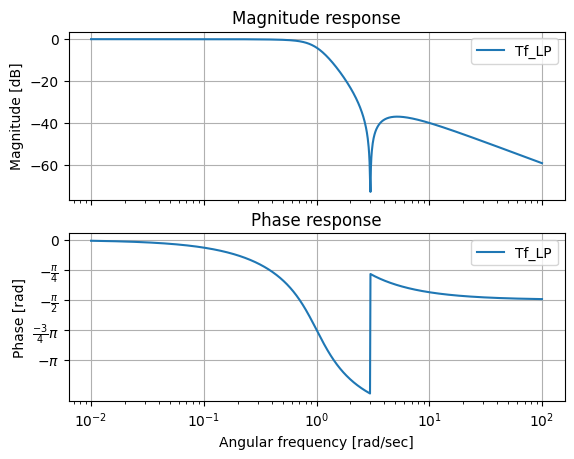

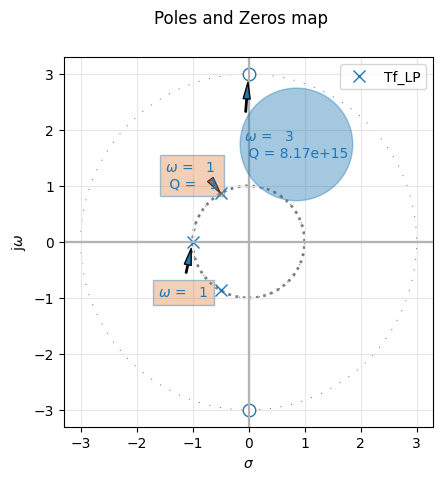

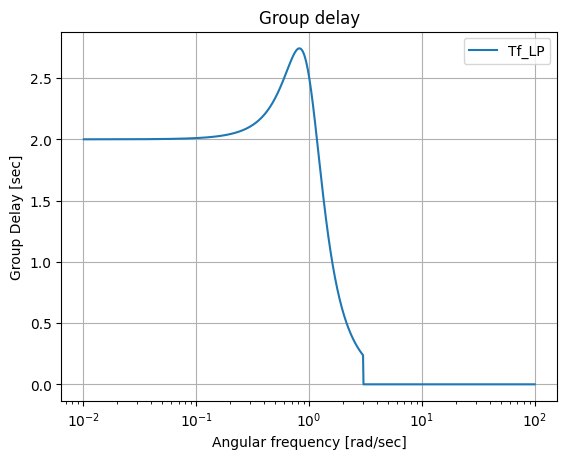

In [2]:
# Módulos externos

import sympy as sp
from sympy.abc import s
# Ahora importamos las funciones de PyTC2

from pytc2.sistemas_lineales import analyze_sys, parametrize_sos, pretty_print_lti, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle
import numpy as np
import scipy.signal as sig
from IPython.display import display, Markdown

# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys


# coeficientes de la transferencia Pasabajos Prototipo
Tlp_num = np.array([1/9, 0, 1])
den_aux = np.polymul([1, 1], [1, 1, 1])
Tlp_den = np.array(den_aux)

# Visualización de Pasabajos Prototipo 
num_hp, den_hp = sig.lp2hp(Tlp_num, Tlp_den)

display(Markdown('### Filtro Pasa Bajos Butterworth de Orden 3 Prototipo Normalizado' ))

pretty_print_lti(Tlp_num, Tlp_den)

# Transformación y Visualización de Pasabajos Prototipo a Pasaaltos Requerido
num_hp, den_hp = sig.lp2hp(Tlp_num, Tlp_den)

display(Markdown('### Filtro Pasa Altos Butterworth de Orden 3 Normalizado' ))

pretty_print_lti(num_hp, den_hp)


# Simulación Numérica

Tf_LP = TransferFunction(Tlp_num,Tlp_den)
Tf_HP = TransferFunction(num_hp,den_hp)

display(Markdown('### Simulación Numérica Pasa Bajos Prototipo' ))
analyze_sys( Tf_LP, 'Tf_LP' )


### Simulación Numérica Pasa Altos Requerido

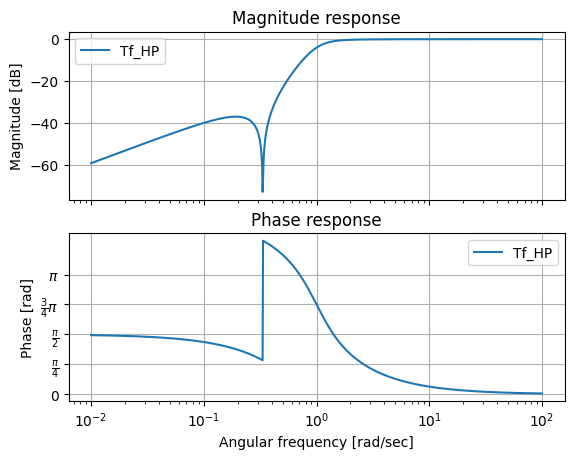

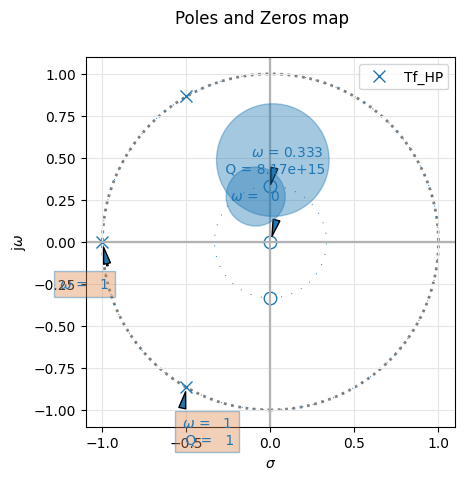

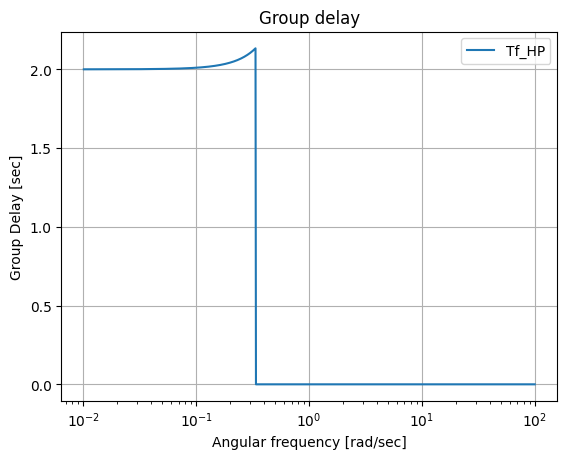

In [3]:
display(Markdown('### Simulación Numérica Pasa Altos Requerido' ))
analyze_sys( Tf_HP, 'Tf_HP' )

# Simulación Circuital de la Implementación Activa Normalizada
La implementación activa a simular se adjunta a continuación.

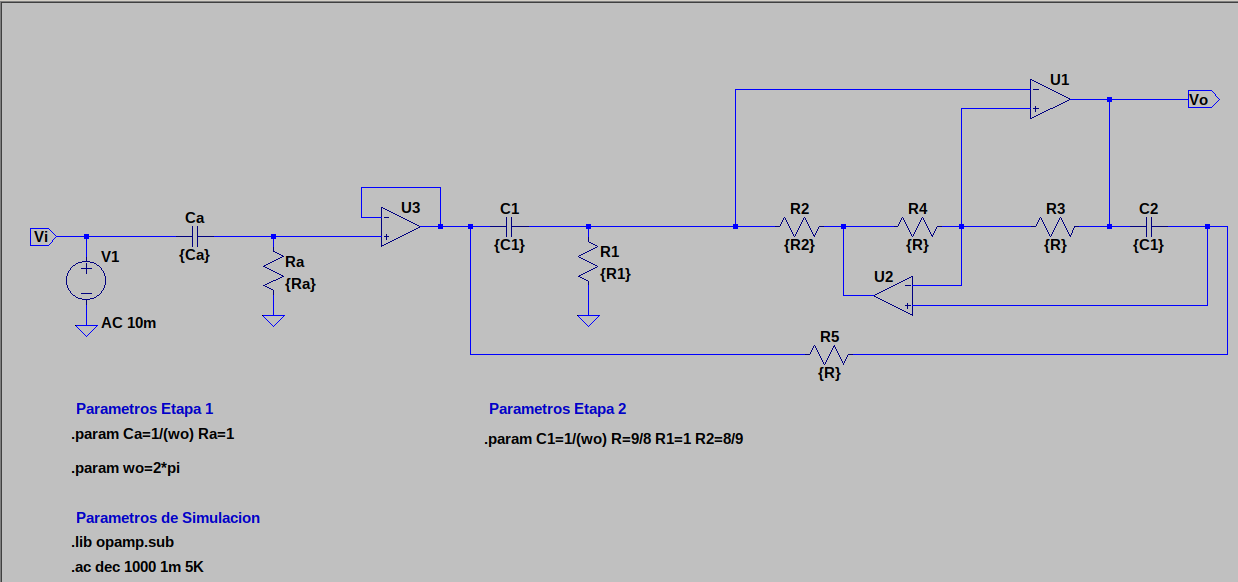

Las simulaciones obtenidas se encuentran a continuación.

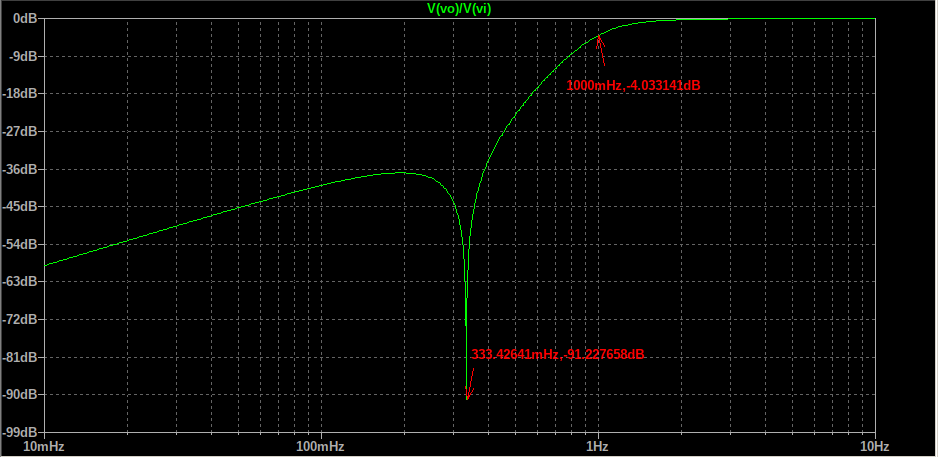

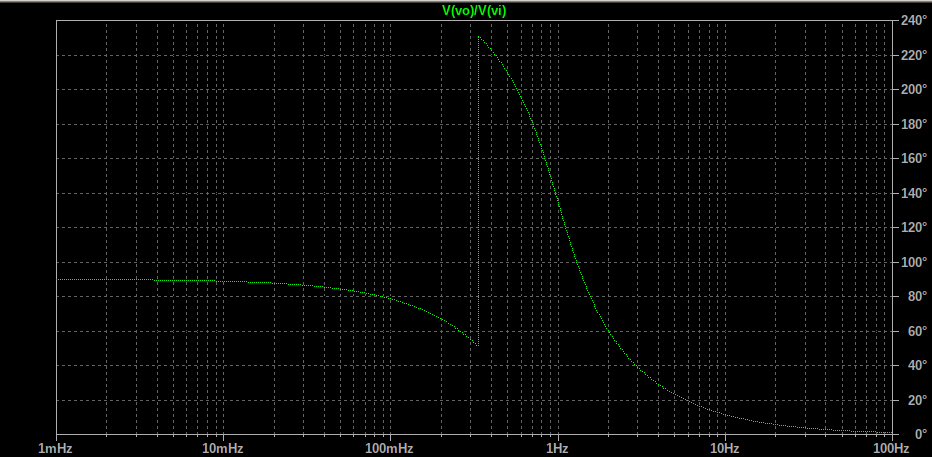


# Simulación Circuital de la Implementación Activa Desnormalizada
La implementación activa desnormalizada a simular se adjunta a continuación.

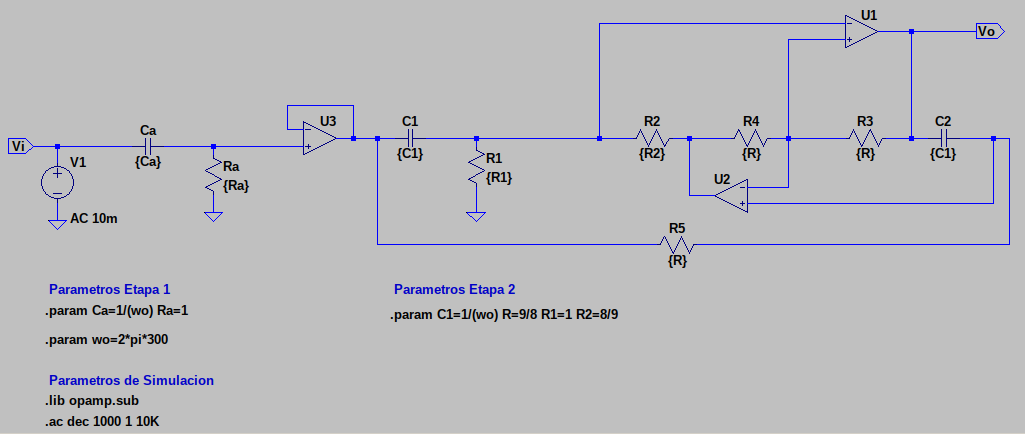

Las simulaciones obtenidas se encuentran a continuación.

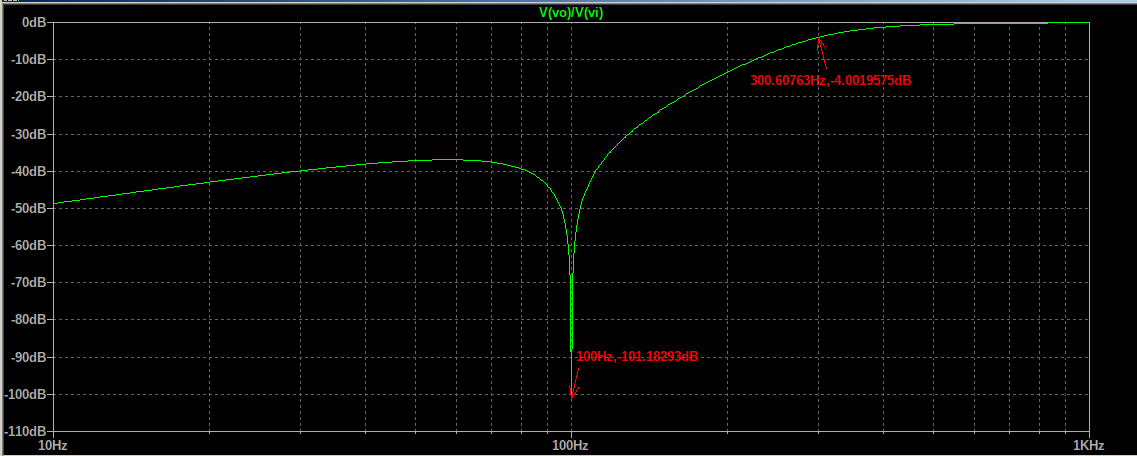

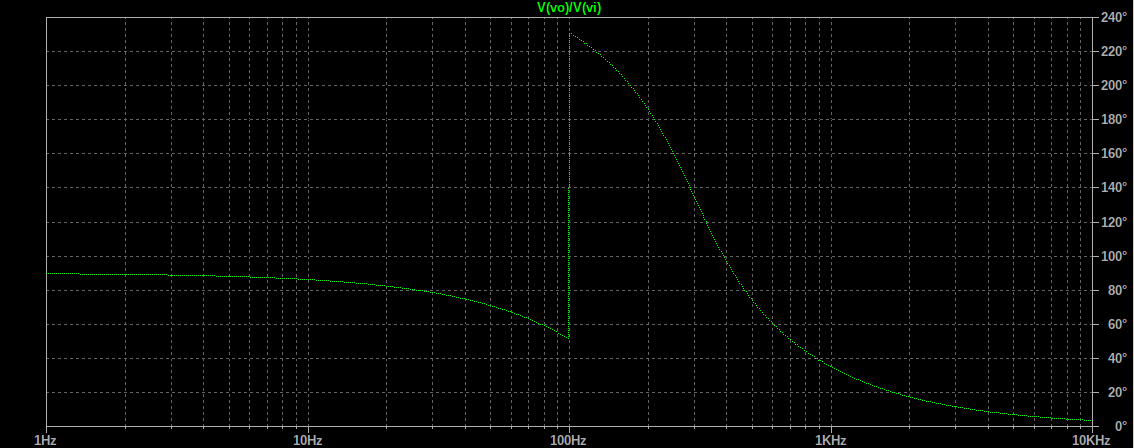

# Discusión Respecto a la Transferencia Bicuadrática Genérica utilizando un GIC planteada en el Schaumann
En el capítulo 5 del libro de Schaumann, se menciona la siguiente topología, y su respectiva transferencia.

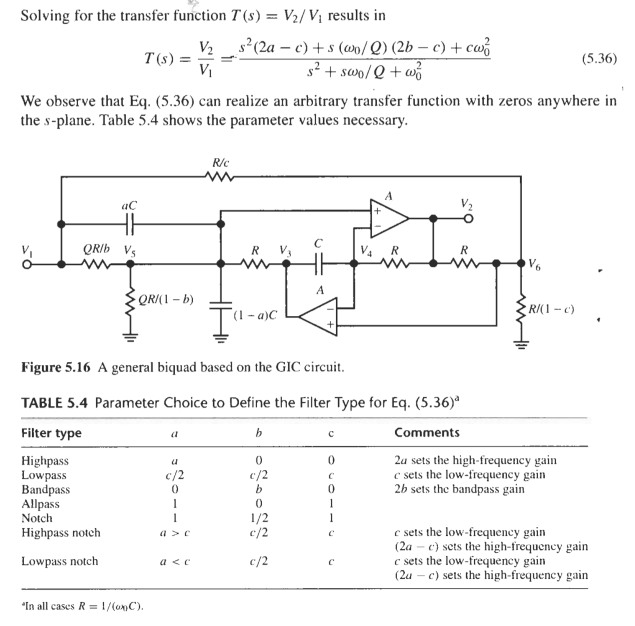

Realizando un análisis cualitativo, se observa que la red utilizada para la implementación de la segunda etapa del filtro es muy similar a la planteada por Schaumann, pero existen algunas diferencias.
Por simple inspección, se observa que si en la Red de Schaumann se cumplen las siguientes condiciones:
* **a = 1**, para que el capacitor en la entrada del GIC esté totalmente levantado de masa.
* **b = 0**, para que la resistencia en la entrada del GIC no esté levantada de masa.
* **c = 1**, para que la resistencia de realimentación esté totalmente levantada de masa.
El circuito eléctrico es muy parecido al utilizado para el presente trabajo. Sin embargo, hay algunas diferencias, a saber:
* La transferencia de la Red de Schaumann obtenida con estos valores NO se corresponde a la transferencia de la Red utilizada en el filtro, ya que en el numerador no se anula el término lineal.
* En la red propuesta por la consigna, R1 y R2 son resistencias de diferente valor, mientras que en la red propuesta en el libro todas las resistencias tienen el mismo valor. Es esta diferencia entre R1 y R2 la que permite obtener un cero de transmisión en el filtro.


# Conclusiones

Se observa que la respuesta de módulo de la transferencia Pasa Altos normalizada, obtenida a partir de la simulación numérica, coincide con la simulada circuitalmente. 
También se destaca que en la implementación normalizada la atenuación para **300 Hz**, correspondiente al inicio de la banda de paso, es de **4 dB**, y no de **3 dB** como correspondería a una respuesta Butterworth. Dicha diferencia de valores se debe principalmente a la existencia del cero de transmisión, que modifica la transferencia del filtro.

Por otro lado, se destaca que en **100 Hz** la atenuación es de casi **100 dB**, es decir que en dicho punto se encuentra el cero de transmisión.

Se concluye entonces que implementación diseñada satisface los requerimientos planteados por el enunciado.